<h1><center>PROYECTO - MODELO</center></h1>

## Librerias a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Datos

In [2]:
# Cargar datos de entrenamiento y testeo 
data = pd.read_csv("training.csv")

In [3]:
data

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [4]:
# Cambiar los label donde s-> 0 y b-> 1. La columna se va a llamar tag
data['Label'] = data["Label"].replace(["b","s"],[0,1] )

In [5]:
# Datos caracteristicas y dato objetivo 
carac_deseadas = ['DER_mass_transverse_met_lep','DER_mass_vis', 'DER_pt_h','DER_deltaeta_jet_jet',
                  'DER_mass_jet_jet','DER_deltar_tau_lep','DER_pt_tot','DER_pt_ratio_lep_tau',
                  'DER_met_phi_centrality','DER_lep_eta_centrality','PRI_tau_pt','PRI_jet_num',
                  'PRI_jet_leading_eta']

x = data[carac_deseadas]
y = data['Label']

## Preprocesamiento de datos - Standar Scaler

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
_ = scaler.fit(x)
x =  scaler.transform(x)

## Datos entrenamiento y testeo 

In [7]:
from sklearn.model_selection import train_test_split

# Separar datos en entrenamiento y prueba

X_train, X_test, Y_train, Y_test = train_test_split(x, y ,test_size = 0.2, random_state = 1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(200000, 13) (50000, 13) (200000,) (50000,)


# Modelos 

## Primer Modelos: Arbol de Desiciones

In [8]:
# Busqueda de mejores parametros
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador y los valores de los hiperparámetros a probar
clf = DecisionTreeClassifier(random_state=42)
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [i for i in range(4, 10)]}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 9}
Mejor puntuación de validación cruzada:
0.8035350000000001


In [9]:
# Modelo decision tree con parametros optimizados
best_clf = grid_search.best_estimator_

In [10]:
# Predecimos Y
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

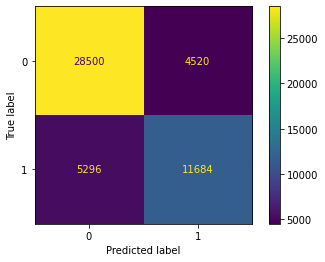

In [11]:
# Graficamos matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(Y_test,y_test_pred,labels=best_clf.classes_)
ConfusionMatrixDisplay(cm, display_labels=best_clf.classes_).plot()

In [12]:
# Calculo de las predicciones en Train y test
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, classification_report
print('El accuracy en train es:',accuracy_score(Y_train,y_train_pred))
print('El accuracy en test es:', accuracy_score(Y_test,y_test_pred))

El accuracy en train es: 0.81359
El accuracy en test es: 0.80368


In [14]:
print(classification_report(Y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     33020
           1       0.72      0.69      0.70     16980

    accuracy                           0.80     50000
   macro avg       0.78      0.78      0.78     50000
weighted avg       0.80      0.80      0.80     50000



In [15]:
feature_scores= pd.DataFrame(pd.Series(grid_search.best_estimator_.feature_importances_, index=pd.DataFrame(X_train).columns).sort_values(ascending=False)).T

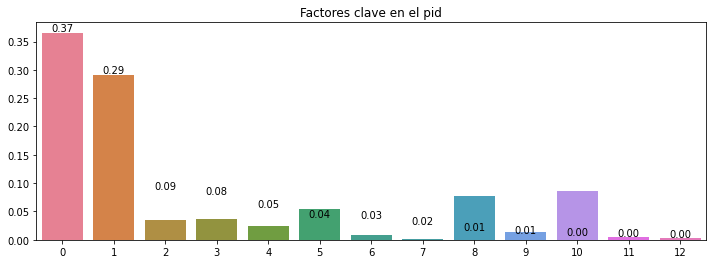

In [16]:
plt.figure(figsize=(12,4))
sns.barplot(data=feature_scores)

for index, value in enumerate(feature_scores.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en el pid")
plt.show()

[Text(0.522889564479638, 0.95, 'X[0] <= -0.014\ngini = 0.451\nsamples = 200000\nvalue = [131313, 68687]'),
 Text(0.27676046380090497, 0.85, 'X[1] <= -0.325\ngini = 0.5\nsamples = 103711\nvalue = [50349, 53362]'),
 Text(0.14048359728506787, 0.75, 'X[4] <= 1.9\ngini = 0.442\nsamples = 42617\nvalue = [28595, 14022]'),
 Text(0.07239819004524888, 0.65, 'X[1] <= -0.601\ngini = 0.42\nsamples = 39277\nvalue = [27480, 11797]'),
 Text(0.03619909502262444, 0.55, 'X[8] <= 0.844\ngini = 0.347\nsamples = 17996\nvalue = [13970, 4026]'),
 Text(0.01809954751131222, 0.45, 'X[5] <= 0.519\ngini = 0.223\nsamples = 6816\nvalue = [5946, 870]'),
 Text(0.00904977375565611, 0.35, 'X[0] <= -0.827\ngini = 0.163\nsamples = 5701\nvalue = [5191, 510]'),
 Text(0.004524886877828055, 0.25, 'X[2] <= 1.806\ngini = 0.255\nsamples = 2159\nvalue = [1835, 324]'),
 Text(0.0022624434389140274, 0.15, 'X[5] <= -0.558\ngini = 0.217\nsamples = 1708\nvalue = [1496, 212]'),
 Text(0.0011312217194570137, 0.05, 'gini = 0.147\nsamples =

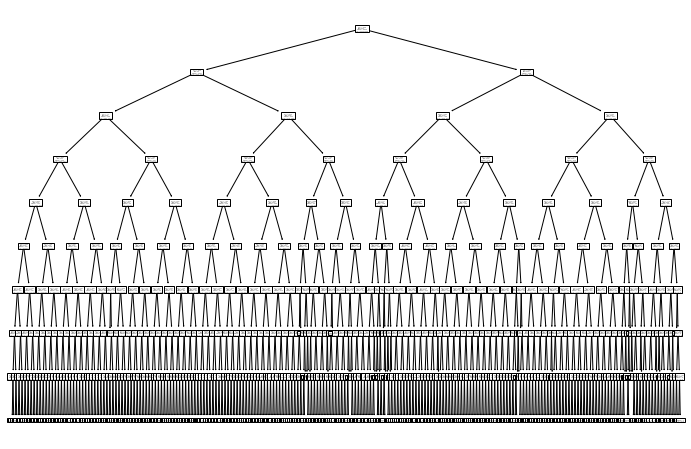

In [17]:
plt.figure(figsize = (12,8))
from sklearn import tree

tree.plot_tree(best_clf.fit(X_train, Y_train))

### Curva ROC

## Segundo Modelo: K- Vecinos 

### Curva ROC